In [82]:
# import the modules we need. 

import ase
from pymatgen import Structure
from ase.io import read, write
from ase import Atoms
from icet import (ClusterSpace, StructureContainer,
                  CrossValidationEstimator, ClusterExpansion)
from pymatgen.io.ase import AseAtomsAdaptor
from tqdm import tqdm
from icet.tools.structure_generation import occupy_structure_randomly

from ase import Atom
from ase.build import bulk
from icet import ClusterSpace
from icet.tools.structure_generation import *

import json

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Helvetica"
plt.rcParams["mathtext.fontset"] ='custom'
plt.rcParams['mathtext.rm'] = 'Helvetica'
plt.rcParams['mathtext.it'] = 'Helvetica:italic'
plt.rcParams['mathtext.bf'] = 'Helvetica'
plt.rcParams["font.size"] = "8"
plt.rcParams['axes.linewidth'] = 0.75
plt.rcParams['lines.linewidth'] = 0.75
plt.rcParams['lines.markersize'] = 4

! ls  

FIG_S_12-oxygen_vacancy_formation_energies_low_disorder_model.ipynb
Figure_S12-oxygen_vacancy_formation_energies_low_disorder_model.png


In [83]:
ls ../../../Data/Jsons/Low_disorder_model_jsons/

LNMO_layered_in_plane_disorder_O_vac.json
LNMO_layered_in_plane_pristine_voids.json
LNMO_layered_out_of_plane_O_vac.json
LNMO_layered_out_of_plane_pristine.json


In [84]:
# O2
O2 = {'struc':[], 'E': [], 'comp':[], 'vol':[]}

# in plane migration

in_plane_to_map = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
in_plane_pristine = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
in_plane_O_vacancy = {'struc':[], 'E': [], 'comp':[], 'vol':[]}

# out-of-plane migration

out_plane_to_map = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
out_plane_pristine = {'struc':[], 'E': [], 'comp':[], 'vol':[]}
out_plane_O_vacancy = {'struc':[], 'E': [], 'comp':[], 'vol':[]}

def get_json(pathname, results):

    with open(f'{pathname}.json') as data:
            cluster_data = json.load(data)
    for n, calculation in enumerate(cluster_data['calculation_results']):
        atoms = ase.Atoms(numbers=calculation['structure']['numbers'],
                          positions=calculation['structure']['positions'],
                          pbc=calculation['structure']['pbc'],
                          cell=calculation['structure']['cell'])
        numbers = atoms.numbers
        epfu = float(calculation['energy']) *27.2114 # convert from Hartree to eV
        x_O = ( np.count_nonzero(numbers == 8) / 48 ) 
        results['E'].append(epfu)
        results['comp'].append(x_O)
        results['struc'].append(atoms)

path = '../../../Data/Jsons'

# import the pristine structure that we can map the O_vacany structures to
get_json(f'{path}/O2_jsons/O2',O2)

# import in-plane
get_json(f'{path}/Pristine_layered_jsons/LNMO_layered_pristine',in_plane_to_map)
get_json(f'{path}/Low_disorder_model_jsons/LNMO_layered_in_plane_pristine_voids',in_plane_pristine)
get_json(f'{path}/Low_disorder_model_jsons/LNMO_layered_in_plane_disorder_O_vac',in_plane_O_vacancy)

# import out-of-plane

get_json(f'{path}/Low_disorder_model_jsons/LNMO_layered_out_of_plane_pristine',out_plane_to_map)
get_json(f'{path}/Low_disorder_model_jsons/LNMO_layered_out_of_plane_pristine',out_plane_pristine)
get_json(f'{path}/Low_disorder_model_jsons/LNMO_layered_out_of_plane_O_vac',out_plane_O_vacancy)

print(out_plane_to_map)
print(out_plane_pristine)
print(out_plane_O_vacancy)

{'struc': [Atoms(symbols='Li42Mn24Ni6O72', pbc=True, cell=[[11.3822189166, -0.0184889226802, -0.00459530634688], [-4.19600084349, 7.44566544634, -0.0173597074717], [0.152334319655, -0.0750089001727, 14.0084555535]])], 'E': [-1153841.5843544323], 'comp': [1.5], 'vol': []}
{'struc': [Atoms(symbols='Li42Mn24Ni6O72', pbc=True, cell=[[11.3822189166, -0.0184889226802, -0.00459530634688], [-4.19600084349, 7.44566544634, -0.0173597074717], [0.152334319655, -0.0750089001727, 14.0084555535]])], 'E': [-1153841.5843544323], 'comp': [1.5], 'vol': []}
{'struc': [Atoms(symbols='Li42Mn24Ni6O71', pbc=True, cell=[[11.3968196065, -0.0457881749466, -0.038846563593], [-4.21937137438, 7.46362558493, -0.000213680219161], [0.110471004155, -0.0666964512909, 14.0406909275]]), Atoms(symbols='Li42Mn24Ni6O71', pbc=True, cell=[[11.4471638895, 0.0163314571395, 0.0221903618214], [-4.19705836884, 7.44467597731, 0.00361993135182], [0.185749291844, -0.0167973722704, 14.0125236586]]), Atoms(symbols='Li42Mn24Ni6O71', pbc=

In [85]:
from icet.tools import map_structure_to_reference

# map the in-plane structures
in_plane_mapped_O_vac_structures = []
for s in in_plane_O_vacancy['struc']:
    ideal_structure, info = map_structure_to_reference(s, in_plane_to_map['struc'][0] )
    print(ideal_structure)
    in_plane_mapped_O_vac_structures.append(ideal_structure)
print(len(in_plane_mapped_O_vac_structures))    
    
out_plane_mapped_O_vac_structures = []
for s in out_plane_O_vacancy['struc']:
    ideal_structure, info = map_structure_to_reference(s, out_plane_to_map['struc'][0] )
    print(ideal_structure)
    out_plane_mapped_O_vac_structures.append(ideal_structure)
print(len(out_plane_mapped_O_vac_structures))
#write('mapped_example.cif',(out_plane_mapped_O_vac_structures[0]))

Atoms(symbols='Li42Mn24Ni6O71X', pbc=True, cell=[[11.3500060394, 0.0114506713523, 0.00426001640032], [-4.24858721834, 7.43532350155, -0.0128569241401], [0.00365724683853, -0.0223094908573, 14.0120566483]], Displacement=..., Displacement_Magnitude=..., Minimum_Distances=...)
Atoms(symbols='Li42Mn24Ni6O71X', pbc=True, cell=[[11.3500060394, 0.0114506713523, 0.00426001640032], [-4.24858721834, 7.43532350155, -0.0128569241401], [0.00365724683853, -0.0223094908573, 14.0120566483]], Displacement=..., Displacement_Magnitude=..., Minimum_Distances=...)
Atoms(symbols='Li42Mn24Ni6O71X', pbc=True, cell=[[11.3500060394, 0.0114506713523, 0.00426001640032], [-4.24858721834, 7.43532350155, -0.0128569241401], [0.00365724683853, -0.0223094908573, 14.0120566483]], Displacement=..., Displacement_Magnitude=..., Minimum_Distances=...)
Atoms(symbols='Li42Mn24Ni6O71X', pbc=True, cell=[[11.3500060394, 0.0114506713523, 0.00426001640032], [-4.24858721834, 7.43532350155, -0.0128569241401], [0.00365724683853, -0.0

In [86]:
from polyhedral_analysis.configuration import Configuration
from polyhedral_analysis.octahedral_analysis import *
from polyhedral_analysis.polyhedra_recipe import PolyhedraRecipe

recipe_X = PolyhedraRecipe( method='distance cutoff', 
                          coordination_cutoff=2.5, 
                          central_atoms='X',
                          vertex_atoms=['Li','Mn','Ni'])

# count the in-plane Li neighbours
in_plane_n_Li_neighbours = []
for m in in_plane_mapped_O_vac_structures:
    pymat_m = AseAtomsAdaptor.get_structure(m)
    config_X = Configuration( structure=pymat_m, recipes=[recipe_X] )
    for p in config_X.polyhedra:
        n =  6-(p.vertex_labels.count('Li'))
        print(n)
    in_plane_n_Li_neighbours.append(n)
print(in_plane_n_Li_neighbours)

out_plane_n_Li_neighbours = []
for m in out_plane_mapped_O_vac_structures:
    pymat_m = AseAtomsAdaptor.get_structure(m)
    config_X = Configuration( structure=pymat_m, recipes=[recipe_X] )
    for p in config_X.polyhedra:
        n =  6-(p.vertex_labels.count('Li'))
        print(n)
    out_plane_n_Li_neighbours.append(n)
print(out_plane_n_Li_neighbours)

3
3
3
3
2
2
2
1
1
0
[3, 3, 3, 3, 2, 2, 2, 1, 1, 0]
0
1
1
1
[0, 1, 1, 1]


In [87]:
in_plane_O_vac_energies = []
for n, e in zip(in_plane_n_Li_neighbours,in_plane_O_vacancy['E']):
    print(n ,e)
    if n == 3:
        O_vac_E = e - in_plane_pristine['E'][0] + (0.5*O2['E'][0])
        print(O_vac_E)
        in_plane_O_vac_energies.append(O_vac_E)
    if n == 2:
        O_vac_E = e - in_plane_pristine['E'][0] + (0.5*O2['E'][0])
        print(O_vac_E)
        in_plane_O_vac_energies.append(O_vac_E)
    if n == 1:
        O_vac_E = e - in_plane_pristine['E'][1] + (0.5*O2['E'][0])
        print(O_vac_E)
        in_plane_O_vac_energies.append(O_vac_E)
    if n == 0:
        O_vac_E = e - in_plane_pristine['E'][2] + (0.5*O2['E'][0])
        print(O_vac_E)
        in_plane_O_vac_energies.append(O_vac_E)

print(in_plane_O_vac_energies)


out_plane_O_vac_energies = []
for e in out_plane_O_vacancy['E']:
    O_vac_E = e - out_plane_pristine['E'][0] + (0.5*O2['E'][0])
    print(O_vac_E)
    out_plane_O_vac_energies.append(O_vac_E)

print(out_plane_O_vac_energies)

3 -1151801.4094709938
4.512059786296959
3 -1151802.0749402028
3.846590577331881
3 -1151801.3318461215
4.58968465862381
3 -1151801.8465064864
4.075024293675597
2 -1151802.5333393656
3.3881914144712937
2 -1151803.357091846
2.5644389341450733
2 -1151802.3234602863
3.598070493839259
1 -1151801.2670707444
0.22504167788247287
1 -1151801.297026958
0.19508546421820938
0 -1151800.3191746867
-4.221684218444352
[4.512059786296959, 3.846590577331881, 4.58968465862381, 4.075024293675597, 3.3881914144712937, 2.5644389341450733, 3.598070493839259, 0.22504167788247287, 0.19508546421820938, -4.221684218444352]
-2.8458597798035044
-0.41296496970062435
-0.659987882072528
-1.4155801595788944
[-2.8458597798035044, -0.41296496970062435, -0.659987882072528, -1.4155801595788944]


In [88]:
data = [[],[],[],[],[],[],[]]

for n, e in zip(in_plane_n_Li_neighbours,in_plane_O_vac_energies):
    data[n].append(e)
    
for n, e in zip(out_plane_n_Li_neighbours,out_plane_O_vac_energies):
    data[n].append(e)
    
    

In [89]:
print(data)

[[-4.221684218444352, -2.8458597798035044], [0.22504167788247287, 0.19508546421820938, -0.41296496970062435, -0.659987882072528, -1.4155801595788944], [3.3881914144712937, 2.5644389341450733, 3.598070493839259], [4.512059786296959, 3.846590577331881, 4.58968465862381, 4.075024293675597], [], [], []]


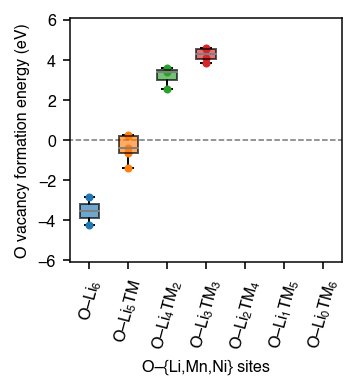

In [92]:


fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(2.1, 1.7))

a = axes


O_bar_colors = ['tab:blue',
              'tab:orange',
              'tab:green',
              'tab:red', 
              'tab:purple',
              'tab:brown',
              'tab:pink']

x = ['O–Li$_6$','O–Li$_5$TM',
     'O–Li$_4$TM$_2$','O–Li$_3$TM$_3$',
     'O–Li$_2$TM$_4$','O–Li$_1$TM$_5$','O–Li$_0$TM$_6$']

N= len(x)
ind = np.arange(N) 
width = 0.5
linewidth = 0.75

x1 = [-1,10]
y1 = [0,0]

colors = ['tab:blue',
              'tab:orange',
              'tab:green',
              'tab:red', 
              'tab:purple',
              'tab:brown',
              'tab:pink']
props = dict(color='black')

flierprops = dict(marker='o', markerfacecolor='grey', markersize=1,
                  linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.0, color='grey')

box_1 = a.boxplot(data, flierprops=flierprops, 
                  medianprops=medianprops, patch_artist=True)

marker_size = 3

a.plot([1]*len(data[0]),data[0],'o', color='tab:blue', markersize = marker_size)
a.plot([2]*len(data[1]),data[1],'o', color='tab:orange', markersize = marker_size)
a.plot([3]*len(data[2]),data[2],'o', color='tab:green', markersize = marker_size)
a.plot([4]*len(data[3]),data[3],'o', color='tab:red', markersize = marker_size)

for patch, color in zip(box_1['boxes'], colors):
    patch.set_edgecolor('k')
    patch.set_facecolor(color)
    patch.set_alpha(0.65)

a.set_ylabel('O vacancy formation energy (eV)')

bottom_axes = [a]
for axis in bottom_axes:
    axis.set_xlabel('O–{Li,Mn,Ni} sites')
    axis.set_xticks([1,2,3,4,5,6,7])
    axis.set_xlim([0.5, 7.5])
    axis.set_ylim([-6.1, 6.1])
    axis.plot(x1 , y1 , '--', color='black', alpha=0.55)
    axis.set_xticks(ind+1)
    axis.set_xticklabels(x, rotation = 75)
    
text_y_position = 53
text_y_position_2 = 55

fig.subplots_adjust(bottom=0.0, top=1.0, left=0.0, right=0.9,
                    wspace=0.25, hspace=0.075)

plt.savefig('Figure_S12-oxygen_vacancy_formation_energies_low_disorder_model.png', 
            dpi=300, bbox_inches='tight')
plt.savefig('Figure_S12-oxygen_vacancy_formation_energies_low_disorder_model.svg', 
            dpi=300, bbox_inches='tight')

plt.show()